In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

In [2]:
filename = "aaa.png"
image = cv2.imread(filename, 0)

In [3]:
def Show(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.title('Изображение А')
    plt.show()

In [4]:
def show(img1, text1, img2, text2, img3, text3):
    plt.figure(figsize=(25,25))
    plt.subplot(2, 4, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title(text1)
    plt.subplot(2, 4, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title(text2)
    plt.subplot(2, 4, 3)
    plt.imshow(img3, cmap='gray')
    plt.axis('off')
    plt.title(text3)
    #plt.subplot(2, 4, 4)
    #plt.imshow(img4, cmap='gray')
    #plt.axis('off')
    #plt.title(text4)

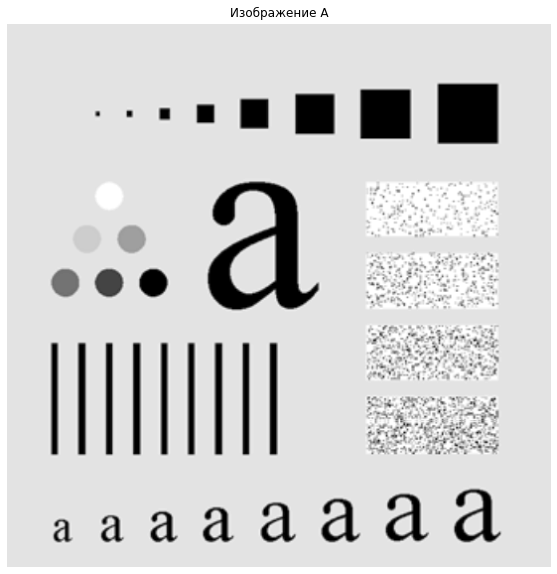

In [5]:
p, q = image.shape[:2] # p и q - длина и ширина изображения
d = np.zeros((p, q))
Show(image)

In [6]:
d_0 = 30
n = 2

# Идеальный фильтр

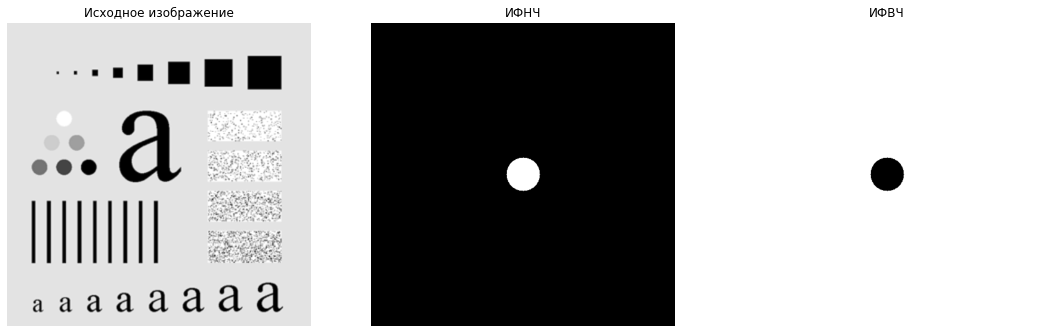

In [7]:
lowPerfect = np.zeros((p, q))
highPerfect = np.zeros((p, q))
for u in range(q):
        for v in range(p):
            d[u][v] = ((u - p / 2) ** 2 + (v - q / 2) ** 2) ** 0.5 # по формуле ИФНЧ D(u,v)
            lowPerfect[u][v] = (d[u][v] <= d_0) # по формуле ИФНЧ H(u,v)
            
            highPerfect[u][v] = (d[u][v] <= d_0)
            highPerfect[u][v] = (d[u][v] > d_0)
show(image, 'Исходное изображение' , lowPerfect,'ИФНЧ' , highPerfect, 'ИФВЧ')

# Спектр изображения

In [8]:
spectrum = np.fft.fftshift(np.fft.fft2(image))
spectrum_log = np.log(np.abs(spectrum))

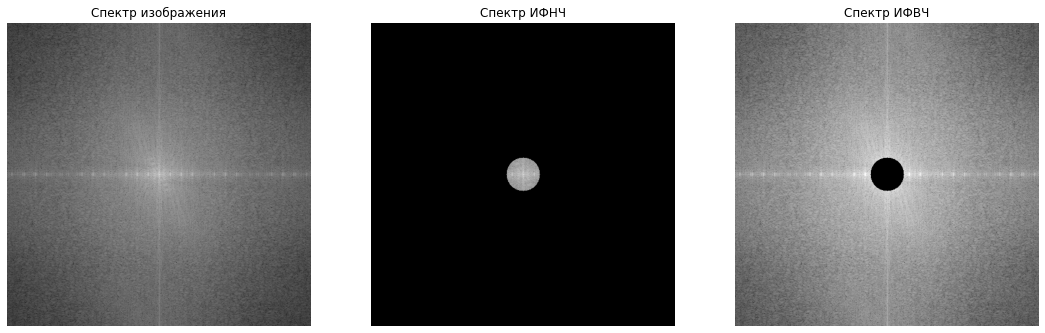

In [9]:
pow = 1

fft_low = lowPerfect * spectrum
spectrum_low = (lowPerfect * spectrum_log) ** pow

fft_high = highPerfect * spectrum
spectrum_high = (highPerfect * spectrum_log) ** pow

show(spectrum_log, 'Спектр изображения', spectrum_low, 'Cпектр ИФНЧ', spectrum_high, 'Спектр ИФВЧ')

# Применение спектра идеального фильтра

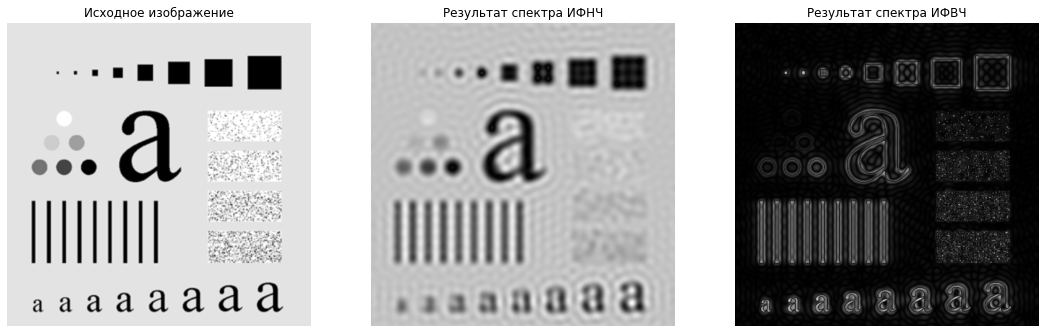

In [10]:
result_low = np.fft.ifft2(np.fft.ifftshift(fft_low))
result_low = np.abs(result_low)

result_high = np.fft.ifft2(np.fft.ifftshift(fft_high))
result_high = np.abs(result_high)

show(image, 'Исходное изображение', result_low, 'Результат спектра ИФНЧ', result_high, 'Результат спектра ИФВЧ')

# Фильтр Баттерфорта

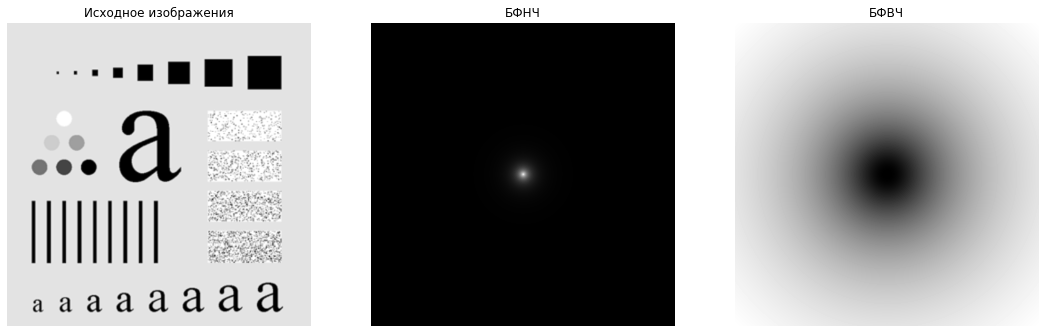

In [28]:
lowButterworth = np.zeros((p, q))
highButterworth = np.zeros((p, q))

for u in range(q): 
        for v in range(p): 
            d[u][v] = ((u - p / 2) ** 2 + (v - q / 2) ** 2) ** 0.5 # по формуле ИФНЧ D(u,v) ###
            lowButterworth[u][v] = 1 / ((1 + d[u][v] / d_0) ** (2 * n)) # ФНЧ Батерворта H(u,v)
            if d[u][v] != 0:
                highButterworth[u][v] = 1 / ((1 + d_0 / d[u][v]) ** (2 * n))
            else:
                highButterworth[u][v] = 0
                
show(image, 'Исходное изображения',  lowButterworth, 'БФНЧ', highButterworth, 'БФВЧ')

# Спектр Баттерфорта

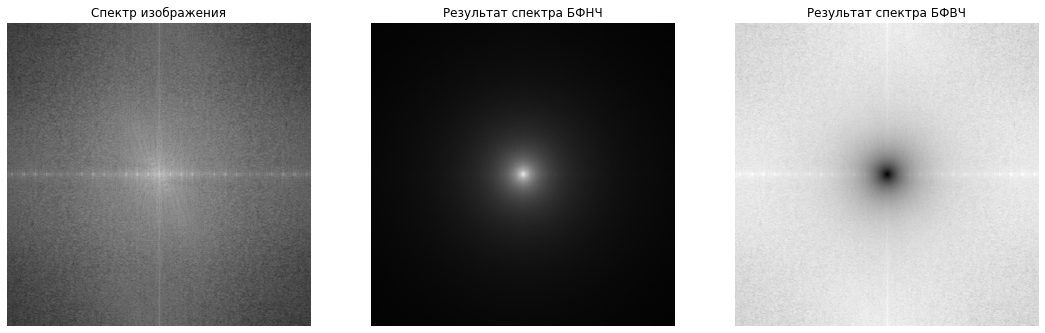

In [37]:
powB = 0.3
    
Bfft_low = lowButterworth * spectrum
Bspectrum_low = (lowButterworth * spectrum_log) ** powB

Bfft_high = highButterworth * spectrum
Bspectrum_high = (highButterworth * spectrum_log) ** powB

show(spectrum_log, 'Спектр изображения', Bspectrum_low, 'Результат спектра БФНЧ', Bspectrum_high, 'Результат спектра БФВЧ')

# Применение спектра Баттерфорта

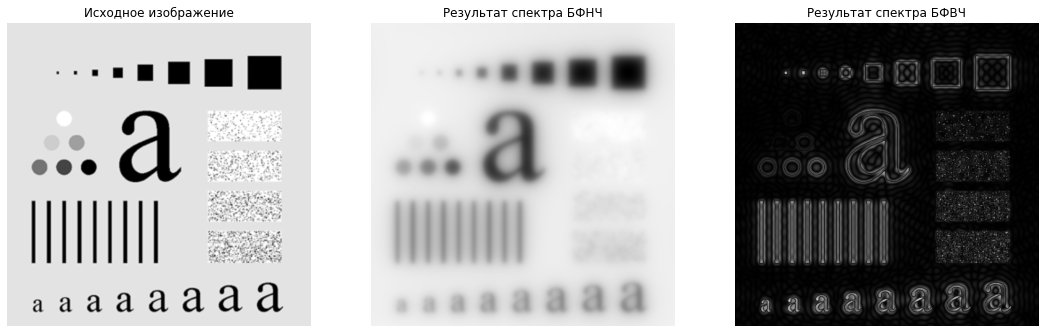

In [44]:
Bresult_low = np.fft.ifft2(np.fft.ifftshift(Bfft_low))
Bresult_low = np.abs(Bresult_low)

Bresult_high = np.fft.ifft2(np.fft.ifftshift(Bfft_high))
Bresult_high = np.abs(result_high)

show(image, 'Исходное изображение', Bresult_low, 'Результат спектра БФНЧ', Bresult_high, 'Результат спектра БФВЧ')

# Фильтр Гаусса

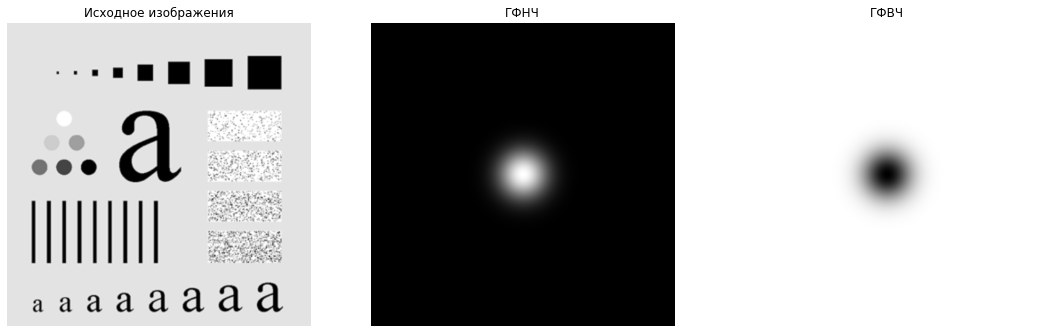

In [43]:
lowGaussian = np.zeros((p, q))
highGaussian = np.zeros((p, q))
for u in range(q): #
    for v in range(p): #
        d[u][v] = ((u - p / 2) ** 2 + (v - q / 2) ** 2) ** 0.5 # по формуле ИФНЧ D(u,v) ###
        lowGaussian[u][v] = math.exp(-(d[u][v] * d[u][v]) / (2 * d_0 * d_0)) # ФНЧ Гаусса H(u,v)

        highGaussian[u][v] = 1 - lowGaussian[u][v]
            
show(image, 'Исходное изображения',  lowGaussian, 'ГФНЧ', highGaussian, 'ГФВЧ')

# Спектр Гаусса

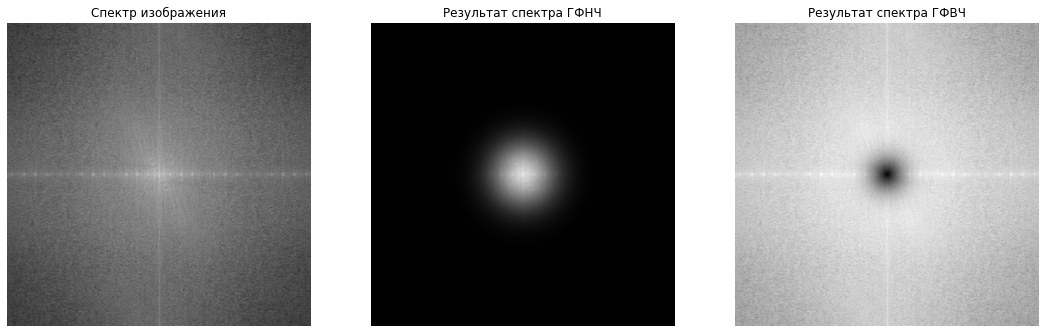

In [40]:
powG = 0.5

Gspectrum_low = (lowGaussian * spectrum_log) ** powG
Gspectrum_high = (highGaussian * spectrum_log) ** powG

show(spectrum_log, 'Спектр изображения', Gspectrum_low, 'Результат спектра ГФНЧ', Gspectrum_high, 'Результат спектра ГФВЧ')

# Применение спектра Гаусса

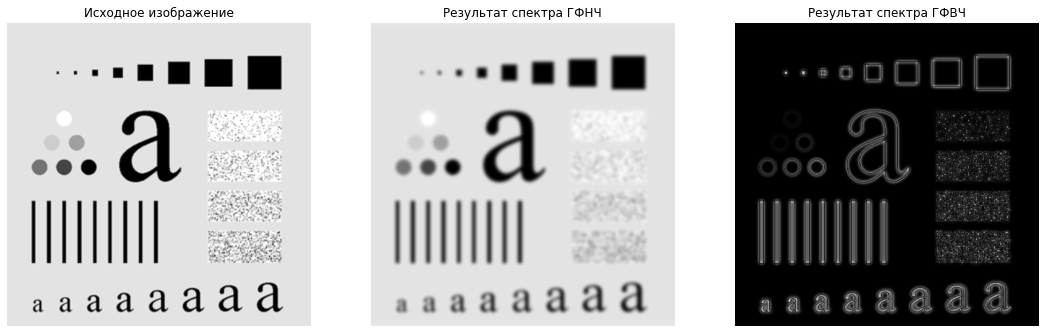

In [42]:
Gfft_high = highGaussian * spectrum
Gfft_low = lowGaussian * spectrum

Gresult_low = np.fft.ifft2(np.fft.ifftshift(Gfft_low))
Gresult_low = np.abs(Gresult_low)

Gresult_high = np.fft.ifft2(np.fft.ifftshift(Gfft_high))
Gresult_high = np.abs(Gresult_high)

show(image, 'Исходное изображение', Gresult_low, 'Результат спектра ГФНЧ', Gresult_high, 'Результат спектра ГФВЧ')